# Exercises

## Set Up


We have again provided code to do the basic loading, review and model-building. Run the cell below to set everything up:

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap

# Environment Set-Up for feedback system.
import sys
sys.path.append('../input/ml-insights-tools')
from learntools.core import binder
binder.bind(globals())

from learntools.ml_insights.ex5 import *
#from ex5 import *
print("Setup Complete")


import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('../input/hospital-readmissions/train.csv')
y = data.readmitted
base_features = ['number_inpatient', 'num_medications', 'number_diagnoses', 'num_lab_procedures', 
                 'num_procedures', 'time_in_hospital', 'number_outpatient', 'number_emergency', 
                 'gender_Female', 'payer_code_?', 'medical_specialty_?', 'diag_1_428', 'diag_1_414', 
                 'diabetesMed_Yes', 'A1Cresult_None']

# Some versions of shap package error when mixing bools and numerics
X = data[base_features].astype(float)

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# For speed, we will calculate shap values on smaller subset of the validation data
small_val_X = val_X.iloc[:150]
my_model = RandomForestClassifier(n_estimators=30, random_state=1).fit(train_X, train_y)

Setup Complete


In [66]:
data.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,4.395640,42.96012,1.341080,15.988440,0.365920,0.203280,0.64300,7.420160,0.456400
std,2.991165,19.76881,1.705398,8.107743,1.224419,0.982973,1.26286,1.940932,0.498105
min,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,2.000000,31.00000,0.000000,10.000000,0.000000,0.000000,0.00000,6.000000,0.000000
50%,4.000000,44.00000,1.000000,15.000000,0.000000,0.000000,0.00000,8.000000,0.000000
75%,6.000000,57.00000,2.000000,20.000000,0.000000,0.000000,1.00000,9.000000,1.000000
max,14.000000,126.00000,6.000000,81.000000,36.000000,64.000000,21.00000,16.000000,1.000000


The first few questions require examining the distribution of effects for each feature, rather than just an average effect for each feature.  Run the following cell for a summary plot of the shap_values for readmission. It will take about 15 seconds to run.

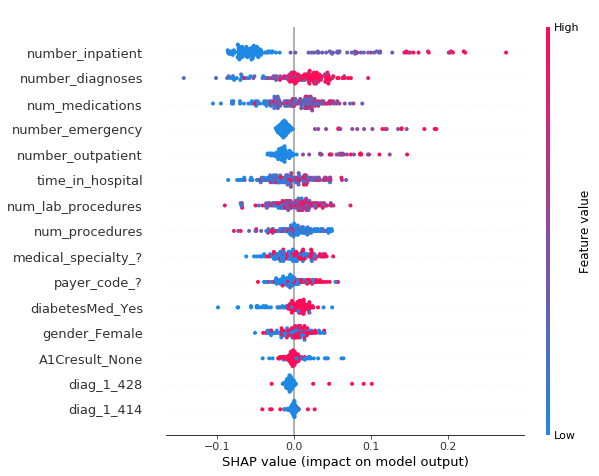

In [2]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(small_val_X)

shap.summary_plot(shap_values[1], small_val_X)

## Question 1

Which of the following features has a bigger range of effects on predictions (e.g. larger difference between most positive and most negative effect)
- `diag_1_428` or
- `payer_code_?`

In [ ]:
# set following variable to 'diag_1_428' or 'payer_code_?'
feature_with_bigger_range_of_effects = _
q_1.check()

Uncomment the line below to see the solution and explanation

In [ ]:
# q_1.solution()

## Question 2

Do you believe the range of effects (distance between smallest effect and largest effect) is a good indication of which feature will have a higher permutation importance? Why or why not?  

If they disagree, which do you think is a better answer for the question "Which of these two features does the model say is more important for us to understand when discussing readmission risks in the population?"

Uncomment the following line after you've decided your answer?

In [ ]:
# q_2.solution()

## Question 3

Both `diag_1_428` and `payer_code_?` are binary variables, taking values of 0 or 1.

From the graph, which do you think would typically have a bigger impact on predicted readmission risk:
- Changing `diag_1_428` from 0 to 1
- Changing `payer_code_?` from 0 to 1

To save you scrolling, we have included a cell below to plot the graph again (this one runs quickly).

In [ ]:
shap.summary_plot(shap_values[1], small_val_X)

In [ ]:
# Set following var to "diag_1_428" if changing it to 1 has bigger effect.  Else set it to 'payer_code_?'
bigger_effect_when_changed = _
q_1.check()

For a solution and explanation, uncomment the line below

In [ ]:
q_3.solution()

## Question 4



In [3]:
small_data = get_data_with_interaction()

## Congrats

That's it!  You can dive into a machine learning model and understand what it has learned about the world. This is an excellent skill for debugging models, building trust, and learning insights to make better decisions. These techniques have revolutionized how I do data science, and I hope they do the same for you.

If you have any feedback on the course, I'd love to hear it [here]().

Even better, if you combine these techniques with [data available on Kaggle](https://www.kaggle.com/datasets) to learn something interesting about the world, share your work [in this forum](https://www.kaggle.com/learn-forum/66354). I'm excited to see what you do with your new skills.
